In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [9]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [10]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [11]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\kiran.salve\AppData\Local\Temp\ipykernel_10432\3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).va

In [12]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([22.  , 71.  ,  0.83, 11.  , 48.  , 31.  , 20.  , 34.  , 24.  ,
       21.  , 26.  , 18.  , 31.  , 24.  , 21.  , 24.  , 20.  , 18.  ,
       36.  , 48.  , 27.  , 27.  , 17.  , 25.  , 16.  , 21.  , 49.  ,
        3.  , 32.  , 26.  , 61.  ,  9.  , 46.  , 24.  , 32.5 , 13.  ,
       58.  , 26.  , 38.  , 16.  ,  4.  , 30.  , 25.  , 18.  , 39.  ,
       24.  , 19.  , 49.  , 23.  , 18.  , 30.  ,  6.  , 32.  , 36.  ,
       32.  , 47.  , 16.  ,  4.  , 24.  , 27.  ,  6.  , 18.  , 32.  ,
       36.  , 33.  , 38.  , 16.  , 51.  , 45.  , 34.  , 46.  , 26.  ,
       28.  ,  0.75, 35.  , 34.  , 17.  , 27.  , 36.  , 19.  , 58.  ,
       21.  , 28.  , 39.  , 18.  , 27.  , 61.  ,  9.  , 60.  , 35.  ,
       19.  , 19.  , 27.  , 21.  , 39.  , 71.  , 40.  , 36.  , 14.  ,
       46.  , 66.  , 20.  , 60.  , 32.  , 27.  ,  2.  , 34.  , 30.  ,
       28.  , 20.  , 30.  , 25.  , 30.  , 16.  , 27.  , 48.  , 19.  ,
        7.  , 31.  , 27.  , 18.  , 45.5 , 15.  , 25.  , 15.  , 31.  ,
       45.  , 40.5 ,

In [13]:
X_train['Age'].isnull().sum()

148

In [14]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,39.0
493,71.0,49.5042,71.0
527,NaN,221.7792,29.0


C:\Users\kiran.salve\AppData\Local\Temp\ipykernel_10432\2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\kiran.salve\AppData\Local\Temp\ipykernel_10432\2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

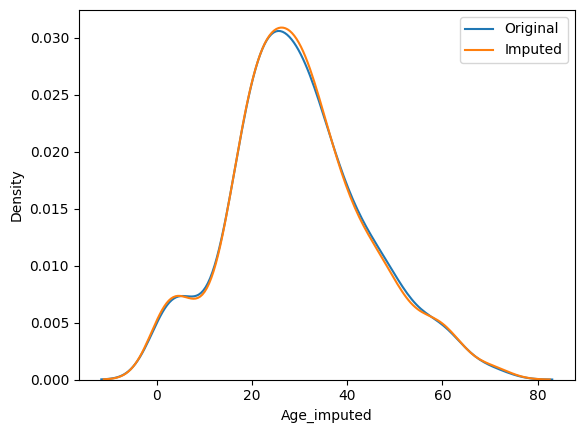

In [15]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [16]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  205.60182297997756


In [17]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,53.127420
Age,71.512440,204.349513,204.349513
Age_imputed,53.127420,204.349513,205.601823


<Axes: >

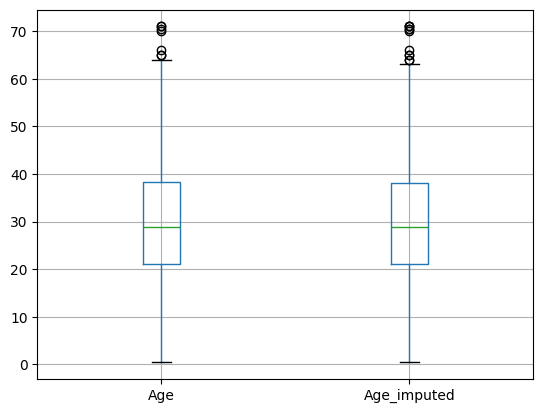

In [18]:
X_train[['Age', 'Age_imputed']].boxplot()

In [ ]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))